In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install wordcloud
!pip install squarify

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from wordcloud import WordCloud
import squarify
import time

In [4]:
data = pd.read_csv('Groceries_dataset.csv')
data.head()

Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

In [5]:
data.Date = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['day_of_week'] = data['Date'].dt.dayofweek

In [6]:
data.head()

Member_number       Date   itemDescription  year  month  day  day_of_week
0           1808 2015-07-21    tropical fruit  2015      7   21            1
1           2552 2015-05-01        whole milk  2015      5    1            4
2           2300 2015-09-19         pip fruit  2015      9   19            5
3           1187 2015-12-12  other vegetables  2015     12   12            5
4           3037 2015-01-02        whole milk  2015      1    2            4

In [7]:
data['itemDescription'].value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

Text(0.5, 1.0, 'Best Sellers')

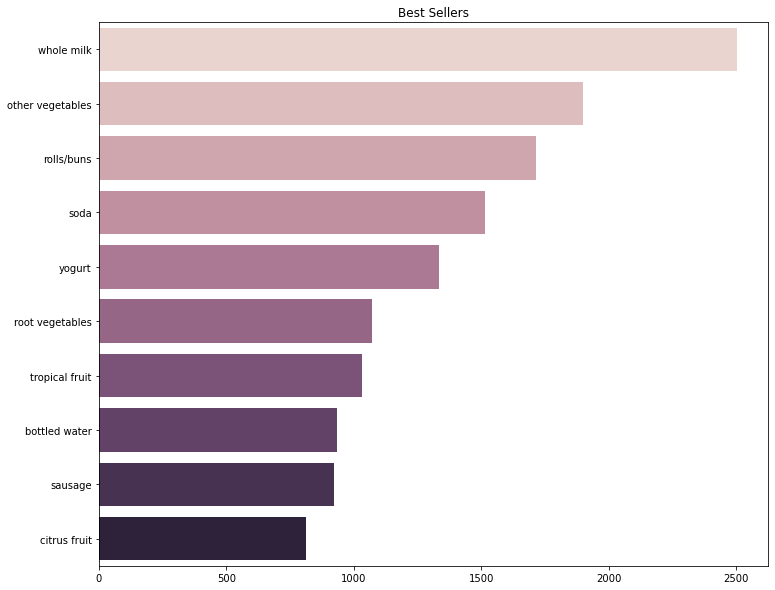

In [8]:
x = list(data['itemDescription'].value_counts()[:10].values)
y = list(data['itemDescription'].value_counts()[:10].index)

plt.figure(figsize=(12,10))
ax=sns.barplot(x=x,y=y, palette=sns.cubehelix_palette(len(x)))
plt.title('Best Sellers')

Text(0.5, 1.0, 'Least Sellers')

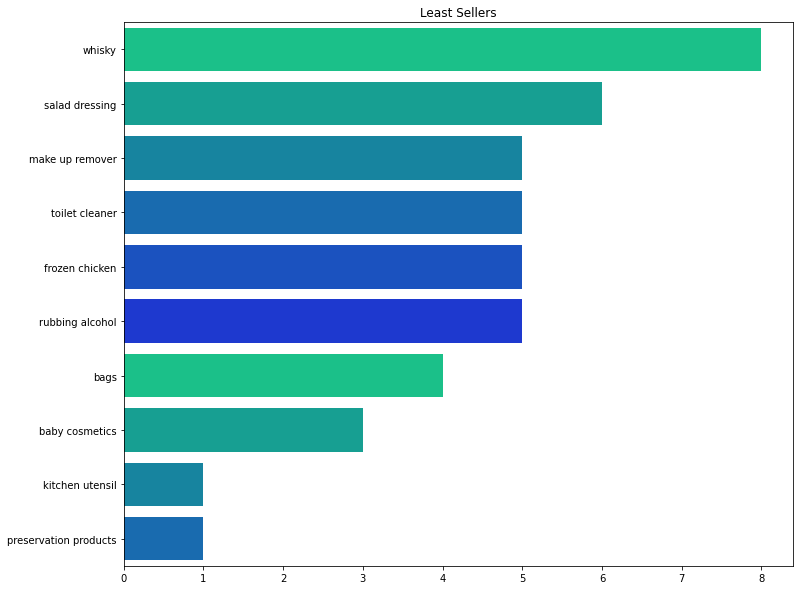

In [9]:
x = list(data['itemDescription'].value_counts()[-10:].values)
y = list(data['itemDescription'].value_counts()[-10:].index)

plt.figure(figsize=(12,10))
ax=sns.barplot(x=x,y=y, palette=sns.color_palette("winter_r"))
plt.title('Least Sellers')

In [10]:
data_year = data.groupby('year')

In [11]:
data_year['itemDescription'].agg(['count'])

count
year       
2014  18277
2015  20488

In [12]:
data_year2014 = data[data['year']==2014]
data_year2014['itemDescription'].value_counts()

whole milk               1038
other vegetables          859
rolls/buns                837
soda                      777
yogurt                    640
                         ... 
frozen chicken              2
baby cosmetics              1
kitchen utensil             1
preservation products       1
bags                        1
Name: itemDescription, Length: 167, dtype: int64

Text(0.5, 1.0, 'Best Sellers(2014)')

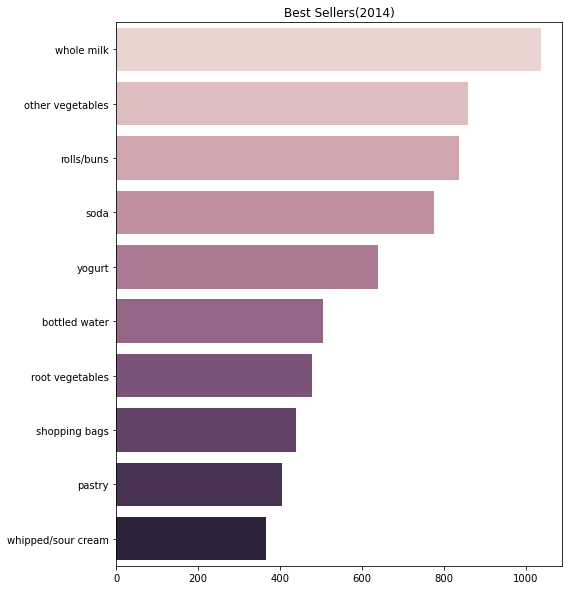

In [13]:
x = list(data_year2014['itemDescription'].value_counts()[:10].index)
y = list(data_year2014['itemDescription'].value_counts()[:10].values)

plt.figure(figsize=(8,10))
ax=sns.barplot(x=y,y=x, palette=sns.cubehelix_palette(len(x)))
plt.title('Best Sellers(2014)')

Text(0.5, 1.0, 'Best Sellers(2014)')

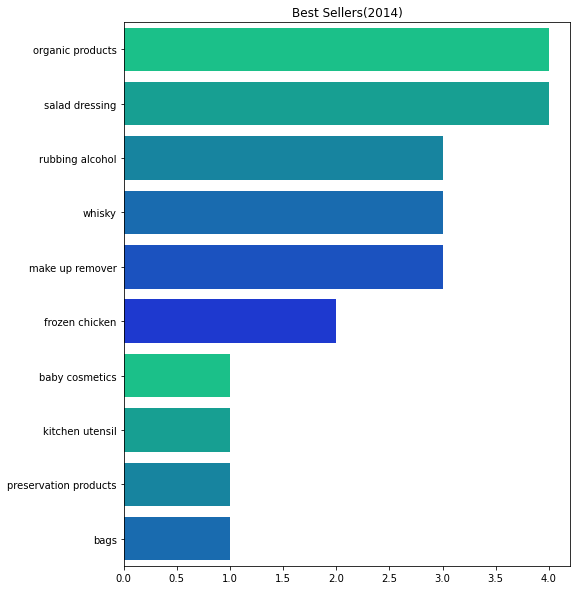

In [14]:
x = list(data_year2014['itemDescription'].value_counts()[-10:].index)
y = list(data_year2014['itemDescription'].value_counts()[-10:].values)

plt.figure(figsize=(8,10))
ax=sns.barplot(x=y,y=x,palette=sns.color_palette("winter_r"))
plt.title('Best Sellers(2014)')

In [15]:
data_year2015 = data[data['year']==2015]
data_year2015['itemDescription'].value_counts()

whole milk              1464
other vegetables        1039
rolls/buns               879
sausage                  744
soda                     737
                        ... 
make up remover            2
rubbing alcohol            2
salad dressing             2
baby cosmetics             2
specialty vegetables       1
Name: itemDescription, Length: 164, dtype: int64

Text(0.5, 1.0, 'Best Sellers(2015)')

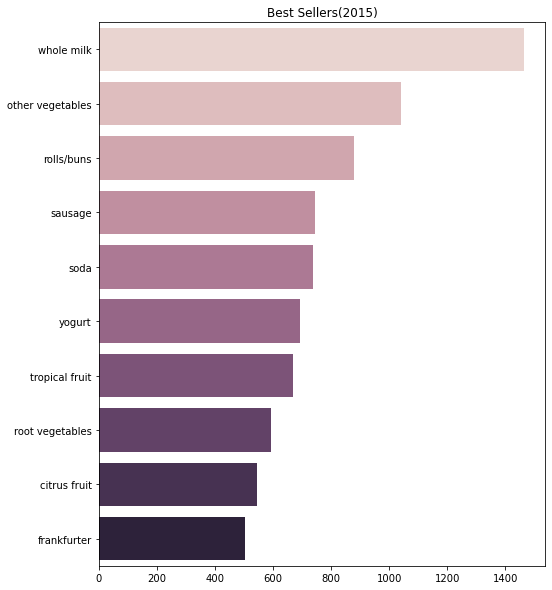

In [16]:
x = list(data_year2015['itemDescription'].value_counts()[:10].index)
y = list(data_year2015['itemDescription'].value_counts()[:10].values)

plt.figure(figsize=(8,10))
ax=sns.barplot(x=y,y=x, palette=sns.cubehelix_palette(len(x)))
plt.title('Best Sellers(2015)')

Text(0.5, 1.0, 'Best Sellers(2015)')

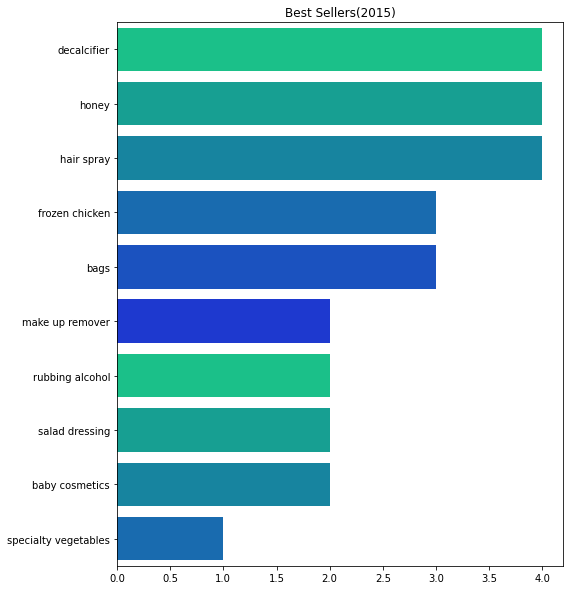

In [17]:
x = list(data_year2015['itemDescription'].value_counts()[-10:].index)
y = list(data_year2015['itemDescription'].value_counts()[-10:].values)

plt.figure(figsize=(8,10))
ax=sns.barplot(x=y,y=x, palette=sns.color_palette("winter_r"))
plt.title('Best Sellers(2015)')

In [18]:
fig = px.sunburst(data, path=['year', 'month', 'day_of_week'],title="Dont Forget to Click Chart to Examine Deeply ")
fig.show()

In [19]:
targets = list(dict(data['itemDescription'].value_counts()).keys())
values = list(dict(data['itemDescription'].value_counts()).values())

fig = px.pie(
    values=values, 
    names=targets,
    title='Item Descriptions',
    color_discrete_sequence=['darkcyan', 'lawngreen']
)
fig.show()

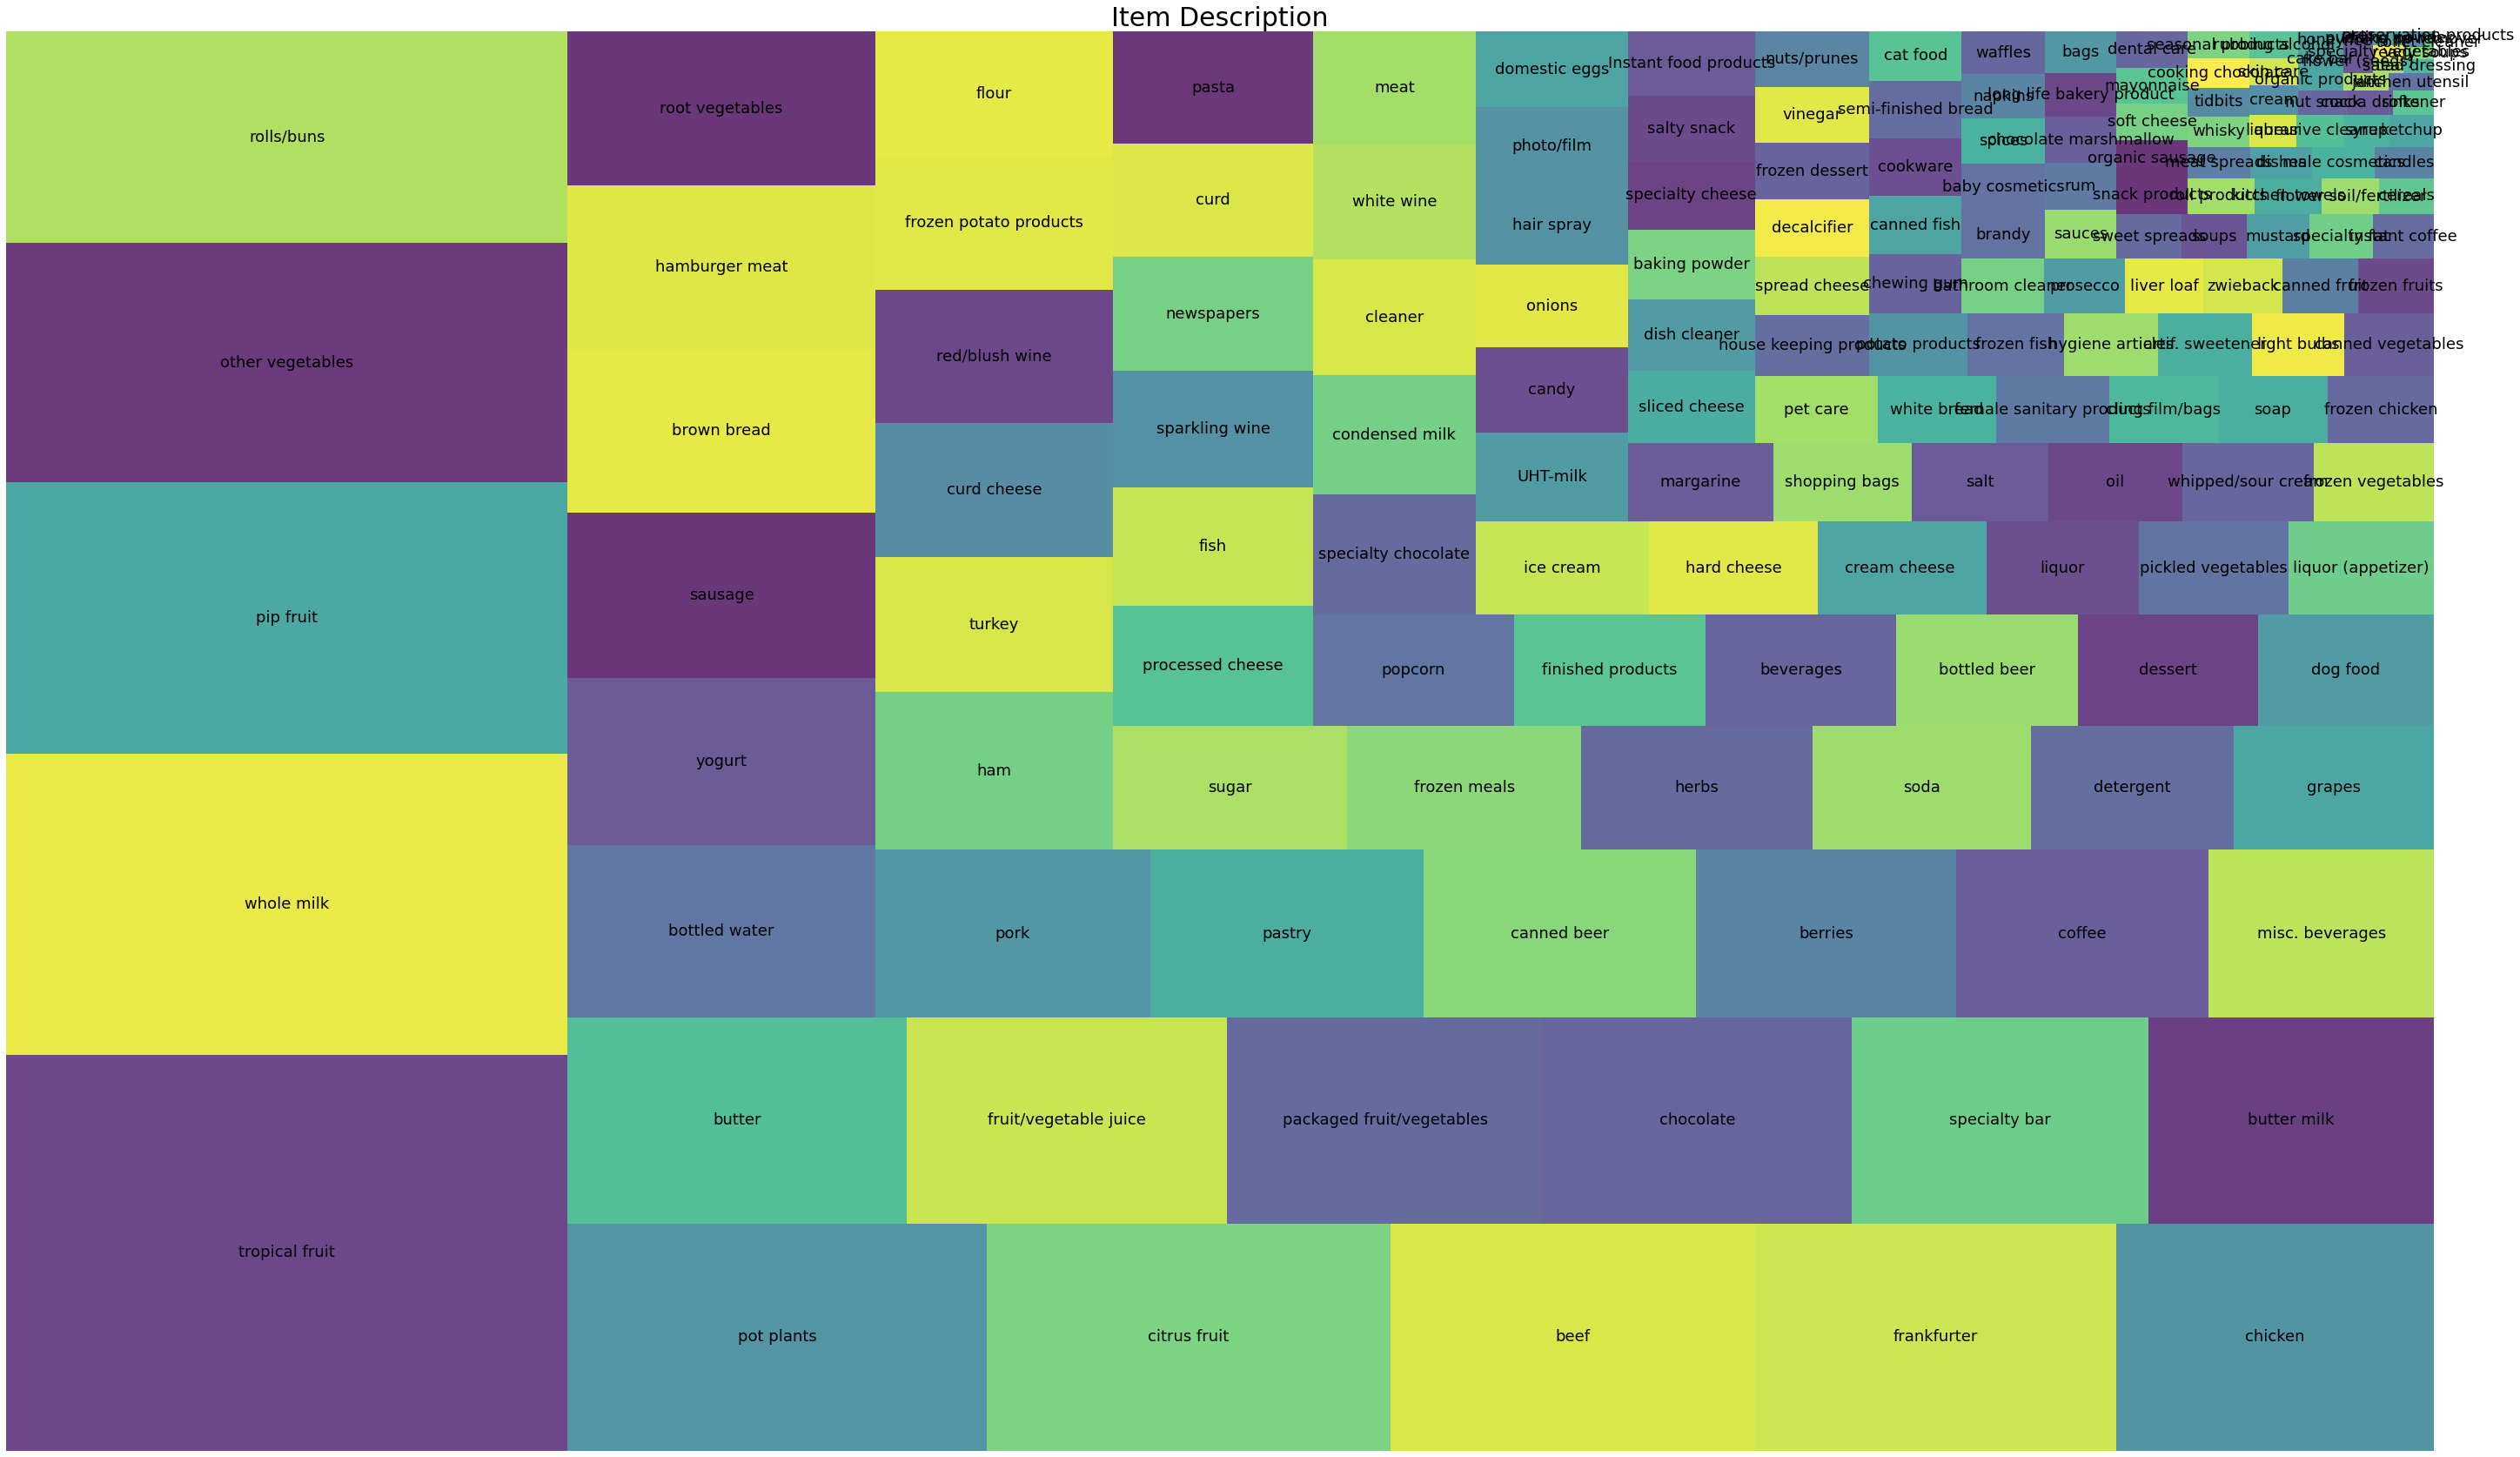

In [20]:
plt.figure(figsize = (50, 30))
squarify.plot(sizes = data.itemDescription.value_counts().values, alpha = 0.8,
              label = data.itemDescription.unique(), text_kwargs={'fontsize':18})
plt.title('Item Description', fontsize = 30)
plt.axis('off')
plt.show()

(-0.5, 511.5, 383.5, -0.5)

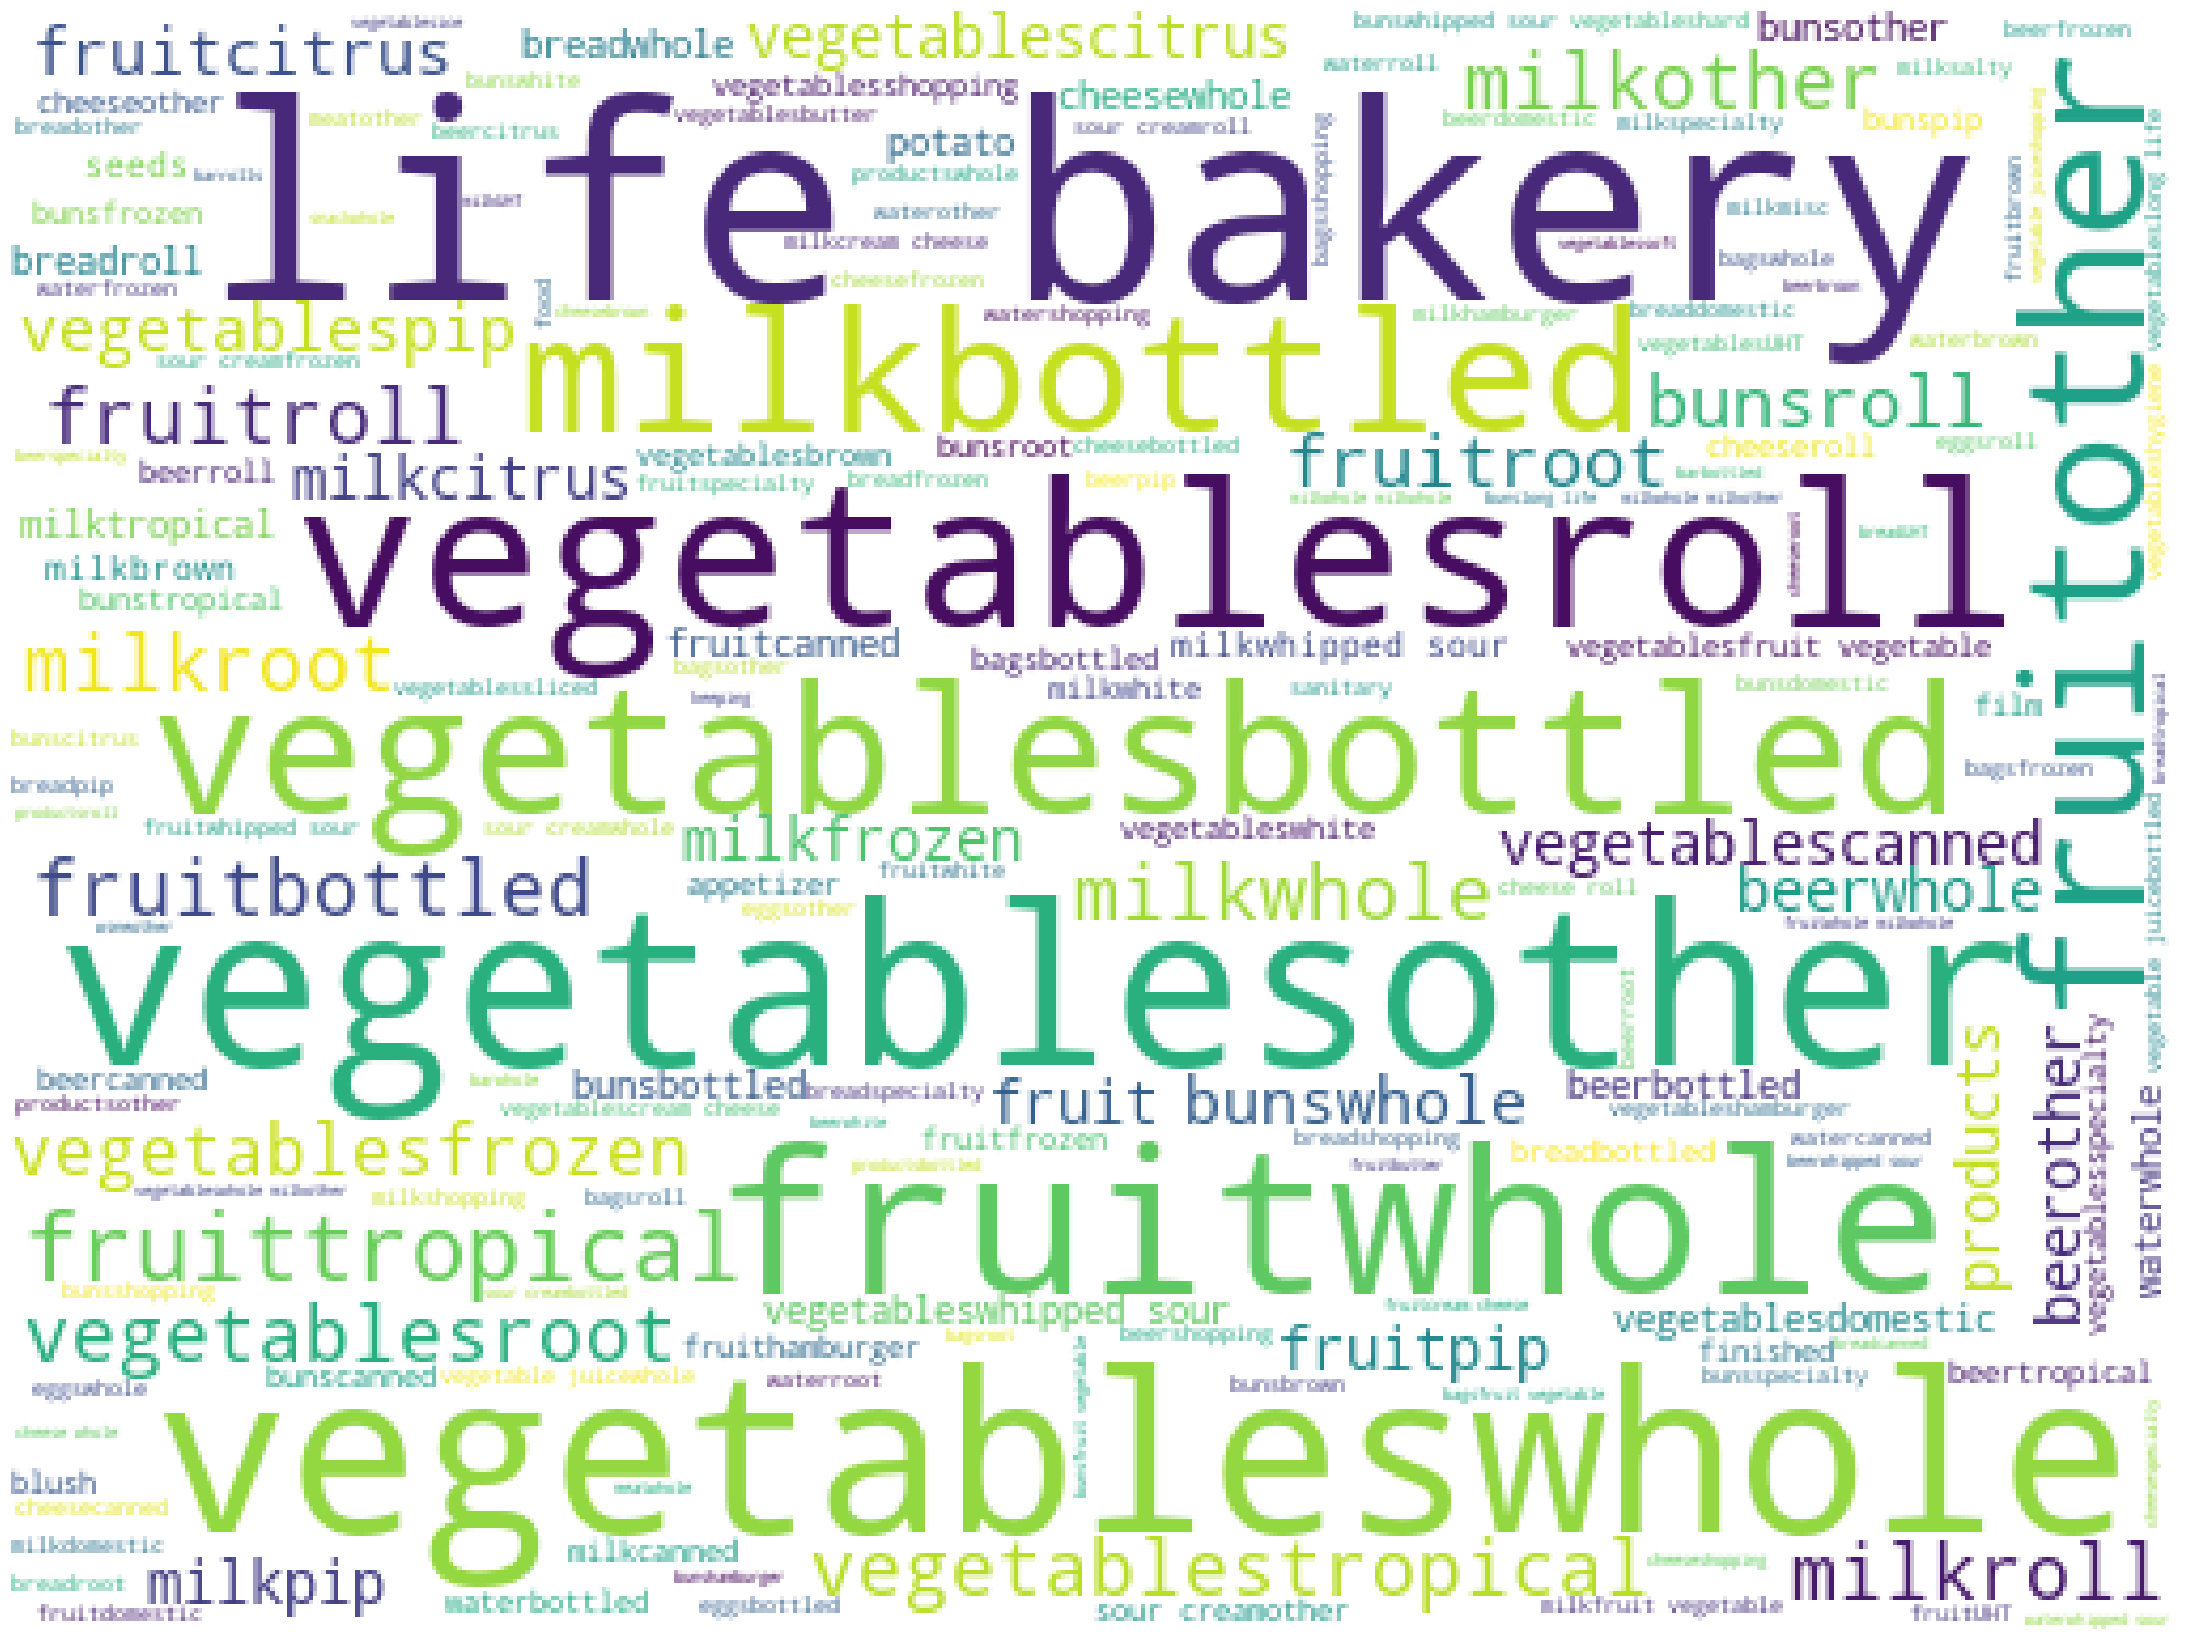

In [21]:
plt.subplots(figsize=(50,30))
wordcloud = WordCloud(background_color = 'white',
                     width=512,height=384).generate("".join(data['itemDescription']))

plt.imshow(wordcloud)
plt.axis('off')

In [22]:
!pip install apyori

In [23]:
from apyori import apriori

In [24]:
apriori_data = pd.read_csv('Groceries_dataset.csv')
apriori_data.head()

Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

In [25]:
apriori_data = apriori_data.groupby(['Member_number','Date'])['itemDescription'].apply(','.join).reset_index()
apriori_data

Member_number        Date  \
0               1000  15-03-2015   
1               1000  24-06-2014   
2               1000  24-07-2015   
3               1000  25-11-2015   
4               1000  27-05-2015   
...              ...         ...   
14958           4999  24-01-2015   
14959           4999  26-12-2015   
14960           5000  09-03-2014   
14961           5000  10-02-2015   
14962           5000  16-11-2014   

                                         itemDescription  
0          sausage,whole milk,semi-finished bread,yogurt  
1                          whole milk,pastry,salty snack  
2                            canned beer,misc. beverages  
3                               sausage,hygiene articles  
4                                soda,pickled vegetables  
...                                                  ...  
14958  tropical fruit,berries,other vegetables,yogurt...  
14959                                bottled water,herbs  
14960                       fruit/vegetable juice,onions  
14961           soda,root vegetables,semi-finished bread  
14962                      bottled beer,other vegetables  

[14963 rows x 3 columns]

In [26]:
apriori_data.itemDescription.iloc[2]

'canned beer,misc. beverages'

In [27]:
apriori_data.itemDescription.iloc[2].split(",")

['canned beer', 'misc. beverages']

In [28]:
for i in range(len(apriori_data.itemDescription)):
    apriori_data.itemDescription[i] = apriori_data.itemDescription[i].split(",")

/tmp/ipykernel_16936/838549035.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
item_list = list(apriori_data.itemDescription)
item_list

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [278]:
rules = apriori(item_list, min_support = 0.1)

In [279]:
rules

<generator object apriori at 0x7f46477dbf90>

In [280]:
list_rules = list(rules)
print(len(list_rules))

3


In [281]:
list_rules[0]

RelationRecord(items=frozenset({'other vegetables'}), support=0.12210118291786407, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'other vegetables'}), confidence=0.12210118291786407, lift=1.0)])

In [282]:
results = []
for item in list_rules[:100]:
        pair = item[0]
        items = [x for x in pair]
        
        value_0 = str(items[0])
        value_1 = str(item[1])[:7]
        value_2 = str(item[2][0][2])[:7]
        value_3 = str(item[2][0][3])[:7]
        
        rows = (value_0, value_1, value_2, value_3)
        results.append(rows)
        
        col_names = ['Title_1','Support','Confidence','Lift']
        
        storage = pd.DataFrame.from_records(results,columns=col_names)
        
        print(storage)
        print(' ')

            Title_1  Support Confidence Lift
0  other vegetables  0.12210    0.12210  1.0
 
            Title_1  Support Confidence Lift
0  other vegetables  0.12210    0.12210  1.0
1        rolls/buns  0.11000    0.11000  1.0
 
            Title_1  Support Confidence Lift
0  other vegetables  0.12210    0.12210  1.0
1        rolls/buns  0.11000    0.11000  1.0
2        whole milk  0.15792    0.15792  1.0
 


In [293]:
minsup=[0.01, 0.03, 0.05, 0.1, 0.15]
elaptime=[]
lenres=[]
for supports in minsup: # задаем условия, реализуем вывод времени и клоичества частых наборов 
    t0= time.time()
    result = list(apriori(item_list, min_support = supports, min_length = 2)) #, 
    print(len(result))
    t1 = time.time()
    print("Time elapsed: ", t1 - t0)
    #rint(result)
    elaptime.append(t1-t0)
    lenres.append(len(result))
print(elaptime)
print(lenres)

69
Time elapsed:  0.047579288482666016
27
Time elapsed:  0.025186777114868164
11
Time elapsed:  0.01929473876953125
3
Time elapsed:  0.017751455307006836
1
Time elapsed:  0.016916513442993164
[0.047579288482666016, 0.025186777114868164, 0.01929473876953125, 0.017751455307006836, 0.016916513442993164]
[69, 27, 11, 3, 1]


In [294]:
forplot=[]
for i in minsup:
    forplot.append(str(i))

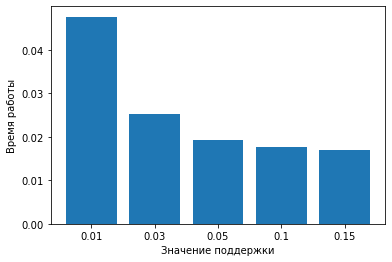

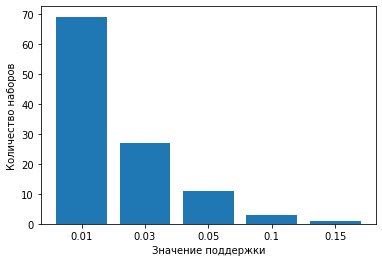

In [295]:
plt.bar(forplot, elaptime)
plt.xlabel("Значение поддержки")
plt.ylabel("Время работы")
plt.show()

plt.bar(forplot, lenres)
plt.xlabel("Значение поддержки")
plt.ylabel("Количество наборов")
plt.show()

[]


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from wordcloud import WordCloud
import squarify

In [56]:
data2 = pd.read_csv('lastfm.csv')
data2.head()

user                   artist sex  country
0     1    red hot chili peppers   f  Germany
1     1  the black dahlia murder   f  Germany
2     1                goldfrapp   f  Germany
3     1         dropkick murphys   f  Germany
4     1                 le tigre   f  Germany

In [57]:
data2['artist'].value_counts()

radiohead                2704
the beatles              2668
coldplay                 2378
red hot chili peppers    1786
muse                     1711
                         ... 
böhse onkelz               99
schandmaul                 98
toto                       98
thin lizzy                 96
mary j. blige              96
Name: artist, Length: 1004, dtype: int64

Text(0.5, 1.0, 'Most popular artist')

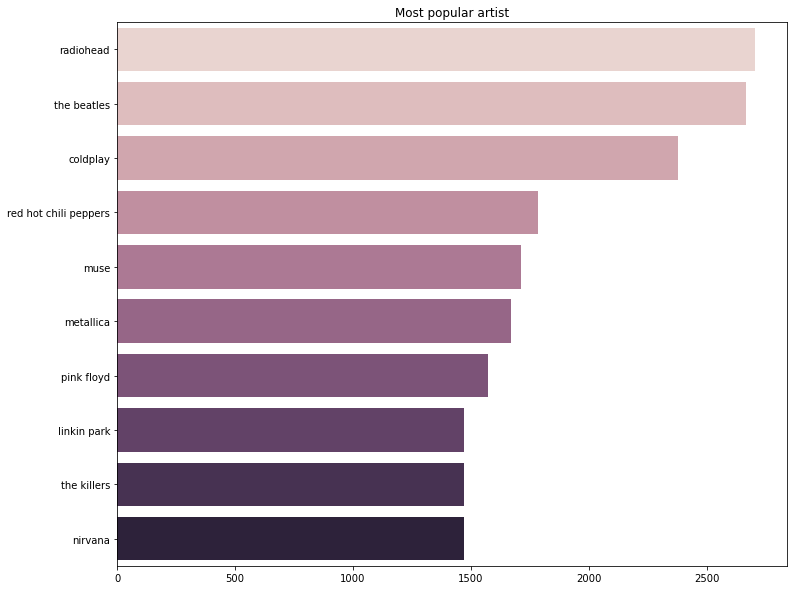

In [58]:
x2 = list(data2['artist'].value_counts()[:10].values)
y2 = list(data2['artist'].value_counts()[:10].index)

plt.figure(figsize=(12,10))
ax=sns.barplot(x=x2,y=y2, palette=sns.cubehelix_palette(len(x2)))
plt.title('Most popular artist')

Text(0.5, 1.0, 'Least Popular Artists')

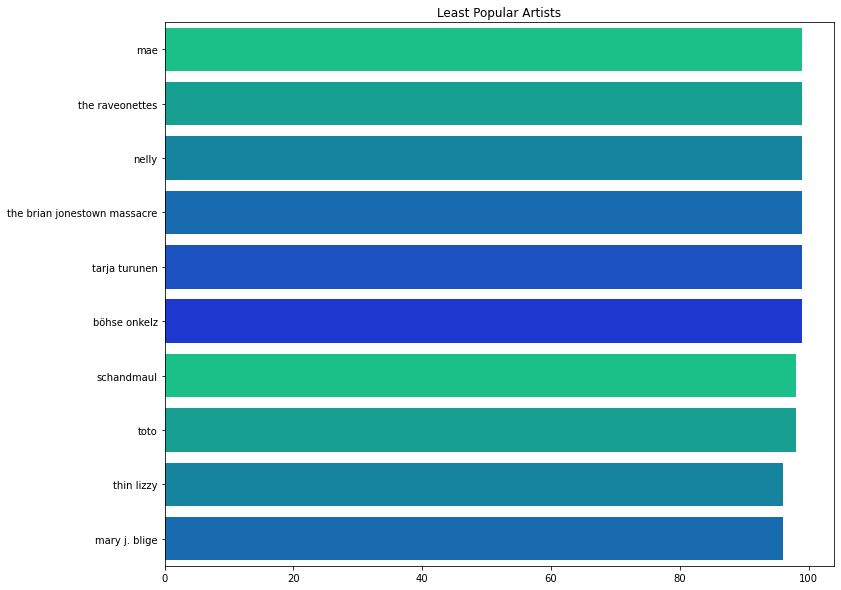

In [59]:
x2 = list(data2['artist'].value_counts()[-10:].values)
y2 = list(data2['artist'].value_counts()[-10:].index)

plt.figure(figsize=(12,10))
ax=sns.barplot(x=x2,y=y2, palette=sns.color_palette("winter_r"))
plt.title('Least Popular Artists')

In [60]:
data_sex = data2.groupby('sex')

In [61]:
data_sex['artist'].agg(['count'])

count
sex        
f     78132
m    211823

In [62]:
data_male = data2[data2['sex']=="m"]
data_male['artist'].value_counts()

radiohead                1982
the beatles              1908
coldplay                 1580
metallica                1424
red hot chili peppers    1344
                         ... 
jonas brothers             41
metro station              40
hey                        40
a fine frenzy              39
the hush sound             37
Name: artist, Length: 1004, dtype: int64

Text(0.5, 1.0, 'Most popular artists(Men)')

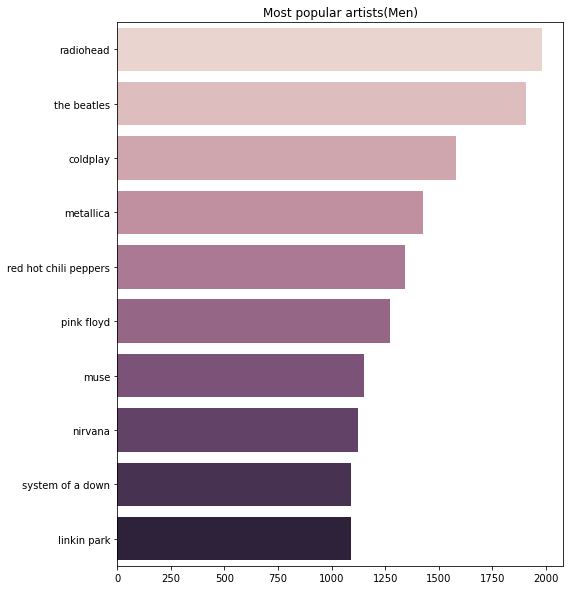

In [63]:
x2 = list(data_male['artist'].value_counts()[:10].index)
y2 = list(data_male['artist'].value_counts()[:10].values)

plt.figure(figsize=(8,10))
ax=sns.barplot(x=y2,y=x2, palette=sns.cubehelix_palette(len(x2)))
plt.title('Most popular artists(Men)')

Text(0.5, 1.0, 'Least Popular Artists (Men)')

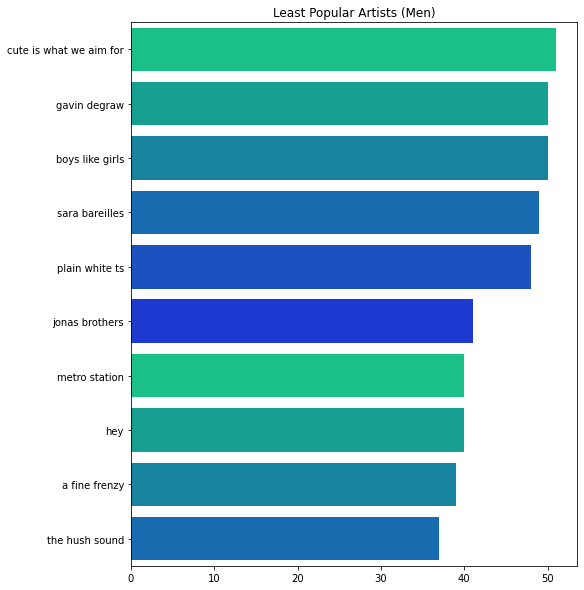

In [64]:
x2 = list(data_male['artist'].value_counts()[-10:].index)
y2 = list(data_male['artist'].value_counts()[-10:].values)

plt.figure(figsize=(8,10))
ax=sns.barplot(x=y2,y=x2, palette=sns.color_palette("winter_r"))
plt.title('Least Popular Artists (Men)')

In [65]:
data_female = data2[data2['sex']=="f"]
data_female['artist'].value_counts()

coldplay                       798
the beatles                    760
radiohead                      722
muse                           561
death cab for cutie            484
                              ... 
down                             5
godspeed you! black emperor      5
public enemy                     4
ice cube                         4
mobb deep                        2
Name: artist, Length: 1004, dtype: int64

Text(0.5, 1.0, 'Most popular artists(Women)')

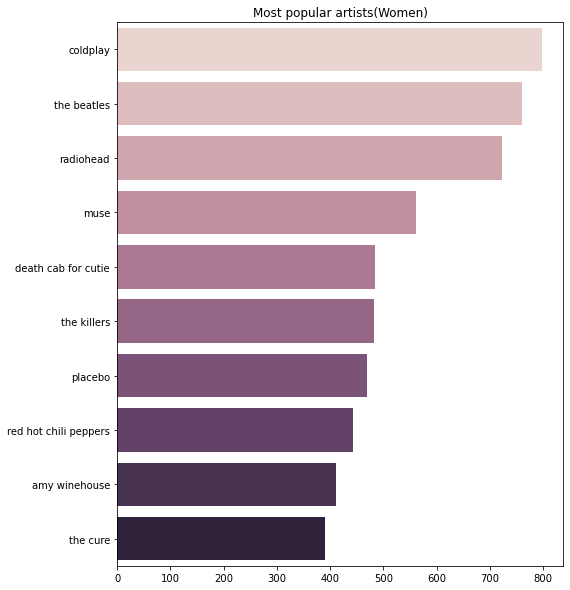

In [66]:
x2 = list(data_female['artist'].value_counts()[:10].index)
y2 = list(data_female['artist'].value_counts()[:10].values)

plt.figure(figsize=(8,10))
ax=sns.barplot(x=y2,y=x2, palette=sns.cubehelix_palette(len(x2)))
plt.title('Most popular artists(Women)')

Text(0.5, 1.0, 'Least popular artists(Women)')

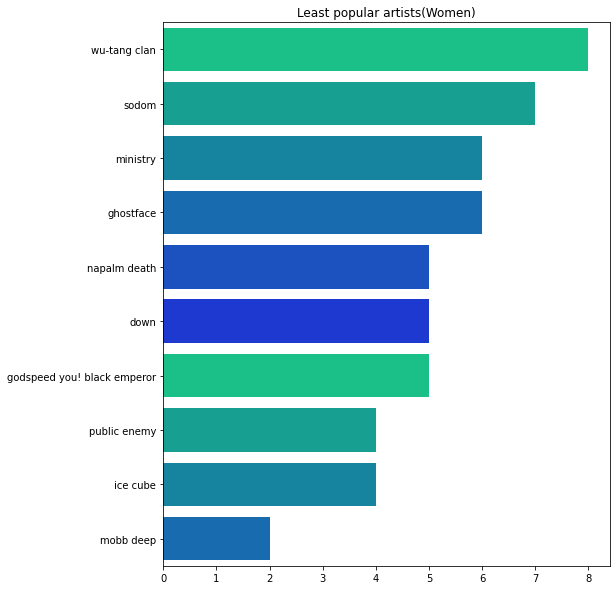

In [67]:
x2 = list(data_female['artist'].value_counts()[-10:].index)
y2 = list(data_female['artist'].value_counts()[-10:].values)

plt.figure(figsize=(8,10))
ax=sns.barplot(x=y2,y=x2, palette=sns.color_palette("winter_r"))
plt.title('Least popular artists(Women)')

In [68]:
data2

user                   artist sex  country
0           1    red hot chili peppers   f  Germany
1           1  the black dahlia murder   f  Germany
2           1                goldfrapp   f  Germany
3           1         dropkick murphys   f  Germany
4           1                 le tigre   f  Germany
...       ...                      ...  ..      ...
289950  19718                bob dylan   f   Canada
289951  19718                   pixies   f   Canada
289952  19718                the clash   f   Canada
289953  19718     a tribe called quest   f   Canada
289954  19718                radiohead   f   Canada

[289955 rows x 4 columns]

In [69]:
fig = px.sunburst(data2, path=['sex','country'],title="Dont Forget to Click Chart to Examine Deeply ")

In [70]:
fig.show()

In [71]:
targets = list(dict(data2['artist'].value_counts()).keys())
values = list(dict(data2['artist'].value_counts()).values())

fig = px.pie(
    values=values, 
    names=targets,
    title='Item Descriptions',
    color_discrete_sequence=['darkcyan', 'lawngreen']
)
fig.show()

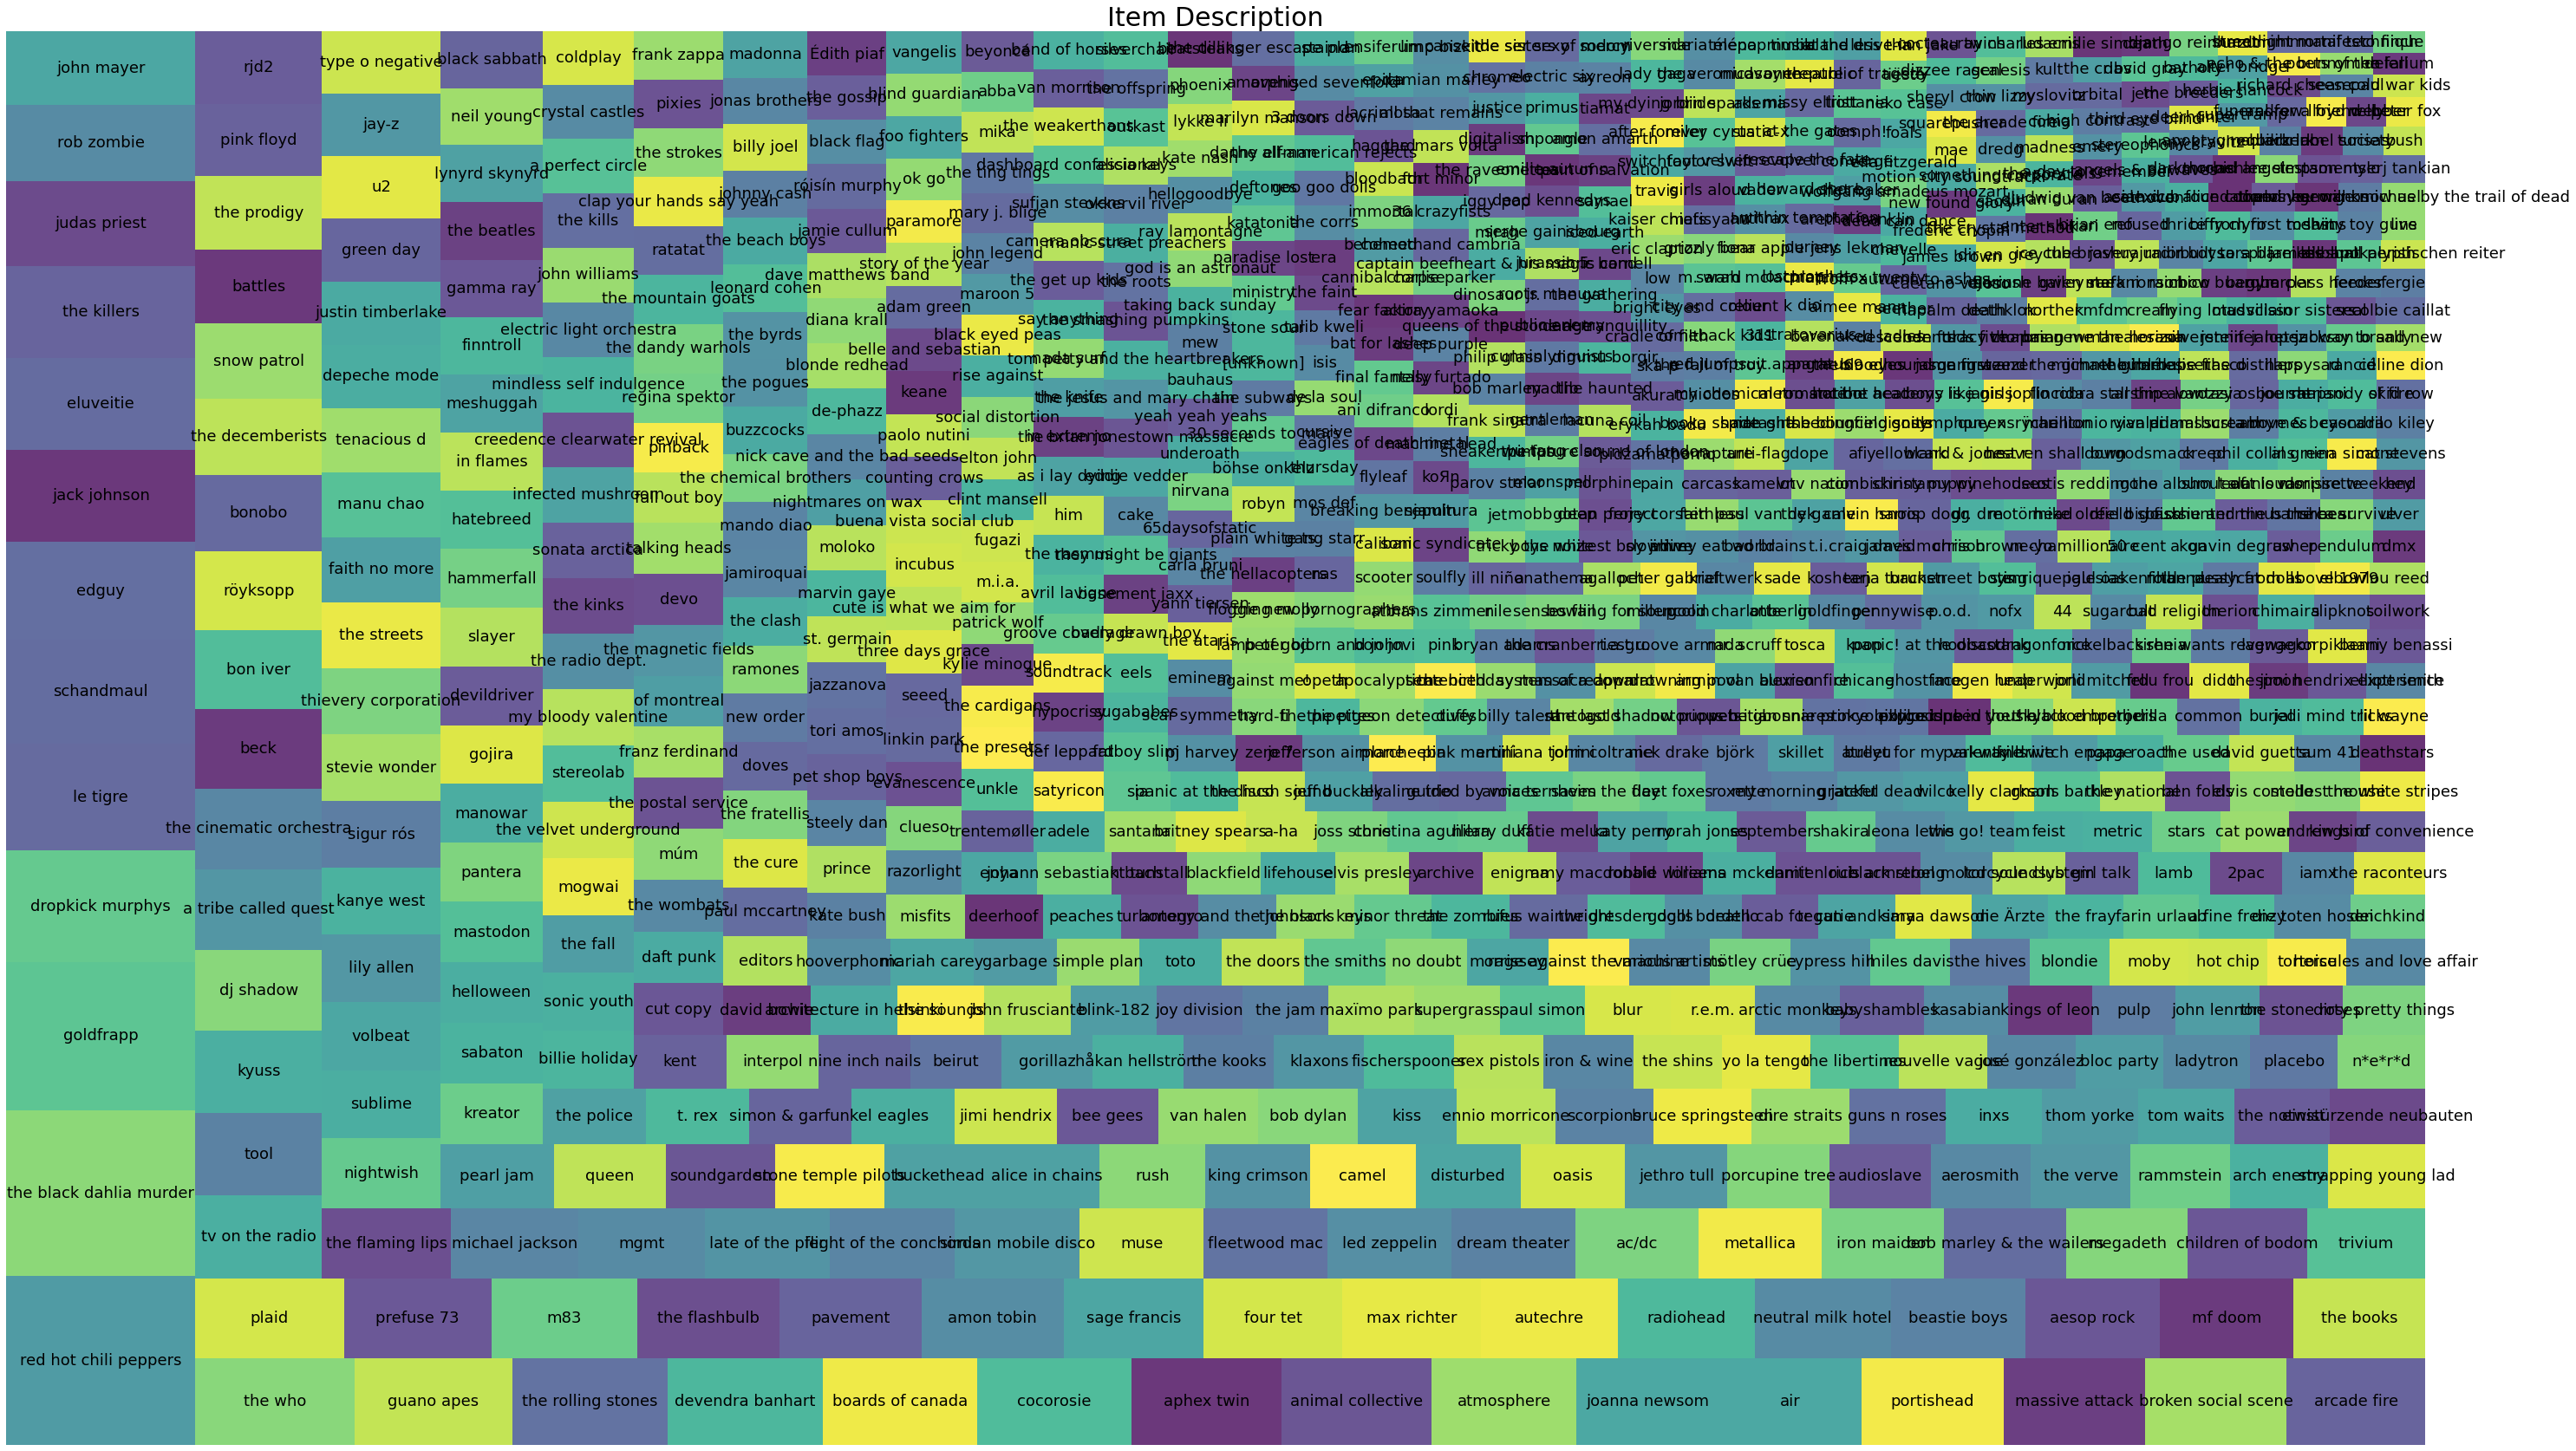

In [72]:
plt.figure(figsize = (50, 30))
squarify.plot(sizes = data2.artist.value_counts().values, alpha = 0.8,
              label = data2.artist.unique(), text_kwargs={'fontsize':18})
plt.title('Item Description', fontsize = 30)
plt.axis('off')
plt.show()

(-0.5, 511.5, 383.5, -0.5)

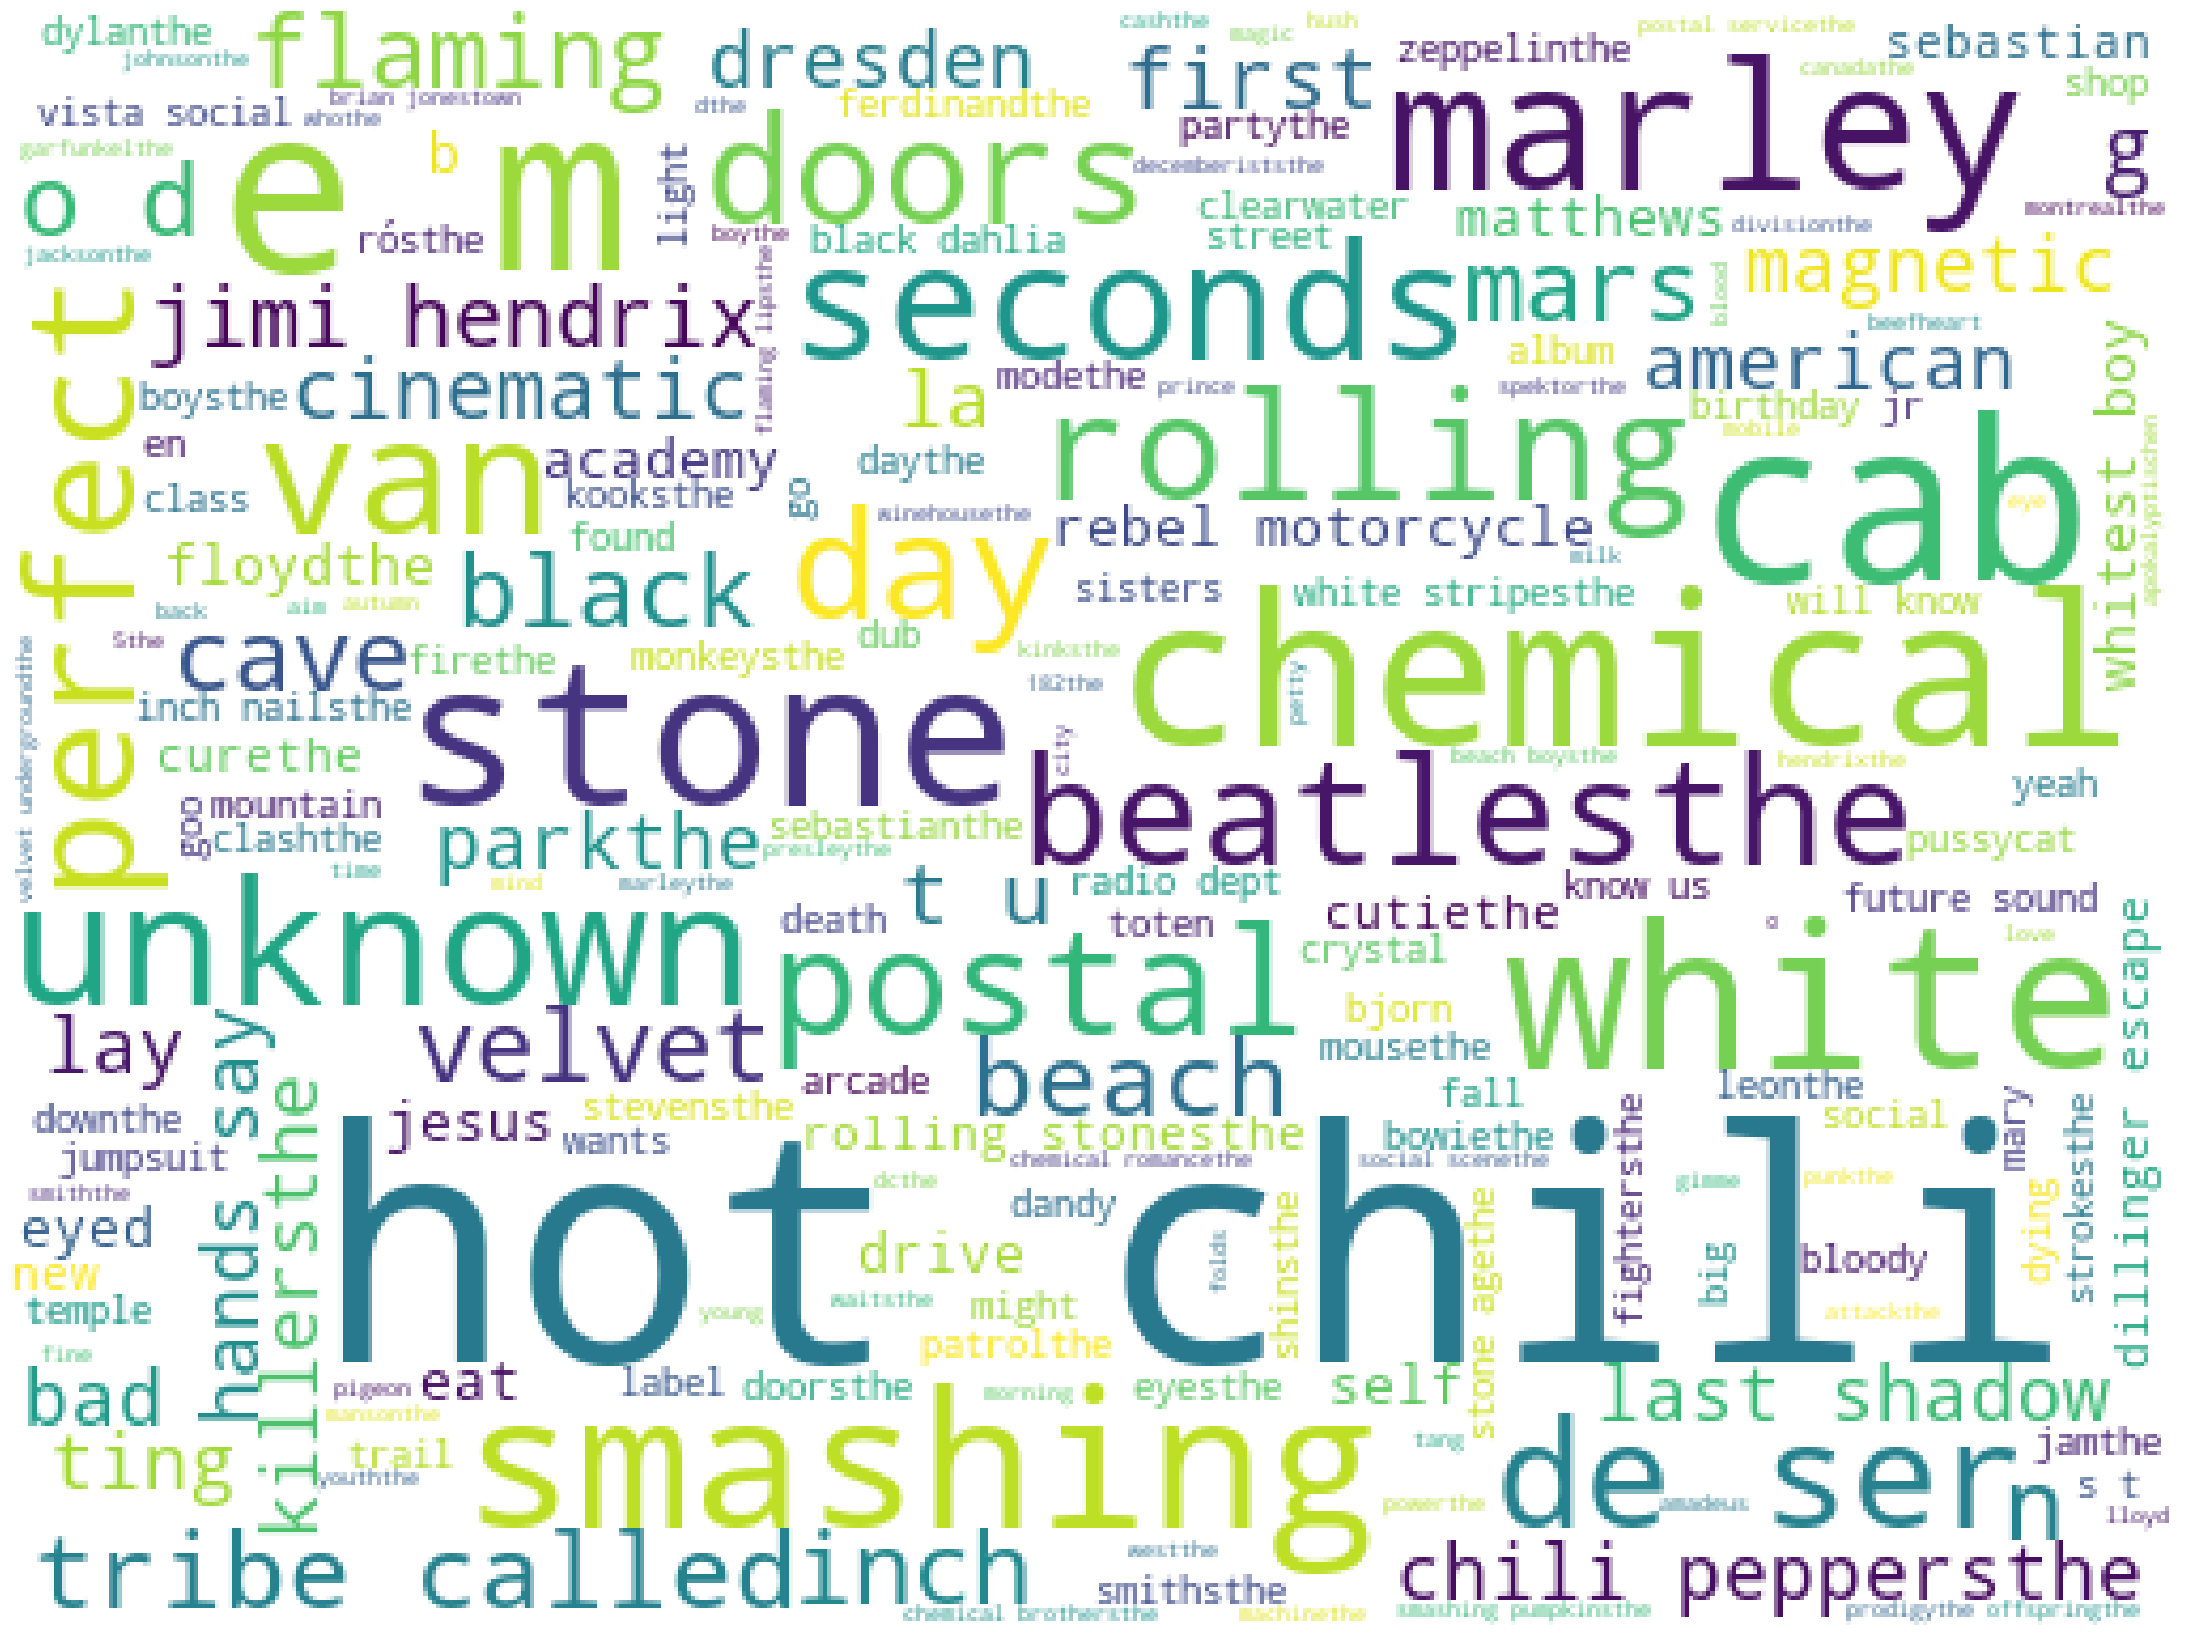

In [73]:
plt.subplots(figsize=(50,30))
wordcloud = WordCloud(background_color = 'white',
                     width=512,
                     height=384).generate("".join(data2['artist']))

plt.imshow(wordcloud)
plt.axis('off')

In [321]:
apriori_data2 = pd.read_csv('lastfm.csv')
apriori_data2

user                   artist sex  country
0           1    red hot chili peppers   f  Germany
1           1  the black dahlia murder   f  Germany
2           1                goldfrapp   f  Germany
3           1         dropkick murphys   f  Germany
4           1                 le tigre   f  Germany
...       ...                      ...  ..      ...
289950  19718                bob dylan   f   Canada
289951  19718                   pixies   f   Canada
289952  19718                the clash   f   Canada
289953  19718     a tribe called quest   f   Canada
289954  19718                radiohead   f   Canada

[289955 rows x 4 columns]

In [322]:
apriori_data2 = apriori_data2.groupby(['user','country','sex'])['artist'].apply(','.join).reset_index()
apriori_data2

user         country sex  \
0          1         Germany   f   
1          3   United States   m   
2          4  United Kingdom   m   
3          5         Finland   m   
4          6        Portugal   m   
...      ...             ...  ..   
14995  19713         Ukraine   m   
14996  19714  United Kingdom   m   
14997  19715  United Kingdom   m   
14998  19717          Brazil   m   
14999  19718          Canada   f   

                                                                                                                                                                                                                                                                                                                                                                                                      artist  
0                                                                                                                                                                                             red hot chili peppers,the black dahlia murder,goldfrapp,dropkick murphys,le tigre,schandmaul,edguy,jack johnson,eluveitie,the killers,judas priest,rob zombie,john mayer,the who,guano apes,the rolling stones  
1                                                         devendra banhart,boards of canada,cocorosie,aphex twin,animal collective,atmosphere,joanna newsom,air,portishead,massive attack,broken social scene,arcade fire,plaid,prefuse 73,m83,the flashbulb,pavement,goldfrapp,amon tobin,sage francis,four tet,max richter,autechre,radiohead,neutral milk hotel,beastie boys,aesop rock,mf doom,the books  
2                                                                 tv on the radio,tool,kyuss,dj shadow,air,a tribe called quest,the cinematic orchestra,beck,bon iver,röyksopp,bonobo,the decemberists,snow patrol,battles,the prodigy,pink floyd,rjd2,the flaming lips,michael jackson,mgmt,the rolling stones,late of the pier,flight of the conchords,simian mobile disco,muse,fleetwood mac,led zeppelin  
3                                                                                                                                                                                                                                                                            dream theater,ac/dc,metallica,iron maiden,bob marley & the wailers,megadeth,children of bodom,trivium,nightwish,sublime,volbeat  
4                                                                                                                                       lily allen,kanye west,sigur rós,pink floyd,stevie wonder,metallica,thievery corporation,iron maiden,the streets,muse,faith no more,manu chao,tenacious d,depeche mode,justin timberlake,green day,snow patrol,dream theater,u2,jay-z,type o negative,pearl jam,queen  
...                                                                                                                                                                                                                                                                                                                                                                                                      ...  
14995                                                                                                                                                                                                                                                              armin van buuren,above & beyond,atb,ferry corsten,paul van dyk,madonna,chicane,linkin park,avril lavigne,the prodigy,blank & jones,tiësto  
14996                                                                                                                                                                                                                                                       misfits,type o negative,arch enemy,red hot chili peppers,satyricon,burzum,cannibal corpse,led zeppelin,slipknot,children of bodom,v

In [323]:
apriori_data2.artist.iloc[2]

'tv on the radio,tool,kyuss,dj shadow,air,a tribe called quest,the cinematic orchestra,beck,bon iver,röyksopp,bonobo,the decemberists,snow patrol,battles,the prodigy,pink floyd,rjd2,the flaming lips,michael jackson,mgmt,the rolling stones,late of the pier,flight of the conchords,simian mobile disco,muse,fleetwood mac,led zeppelin'

In [324]:
apriori_data2.artist.iloc[2].split(",")

['tv on the radio',
 'tool',
 'kyuss',
 'dj shadow',
 'air',
 'a tribe called quest',
 'the cinematic orchestra',
 'beck',
 'bon iver',
 'röyksopp',
 'bonobo',
 'the decemberists',
 'snow patrol',
 'battles',
 'the prodigy',
 'pink floyd',
 'rjd2',
 'the flaming lips',
 'michael jackson',
 'mgmt',
 'the rolling stones',
 'late of the pier',
 'flight of the conchords',
 'simian mobile disco',
 'muse',
 'fleetwood mac',
 'led zeppelin']

In [325]:
for i in range(len(apriori_data.itemDescription)):
    apriori_data2.artist[i] = apriori_data2.artist[i].split(",")

/tmp/ipykernel_16936/1009975089.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [326]:
item_list2 = list(apriori_data2.artist)
item_list2

[['red hot chili peppers',
  'the black dahlia murder',
  'goldfrapp',
  'dropkick murphys',
  'le tigre',
  'schandmaul',
  'edguy',
  'jack johnson',
  'eluveitie',
  'the killers',
  'judas priest',
  'rob zombie',
  'john mayer',
  'the who',
  'guano apes',
  'the rolling stones'],
 ['devendra banhart',
  'boards of canada',
  'cocorosie',
  'aphex twin',
  'animal collective',
  'atmosphere',
  'joanna newsom',
  'air',
  'portishead',
  'massive attack',
  'broken social scene',
  'arcade fire',
  'plaid',
  'prefuse 73',
  'm83',
  'the flashbulb',
  'pavement',
  'goldfrapp',
  'amon tobin',
  'sage francis',
  'four tet',
  'max richter',
  'autechre',
  'radiohead',
  'neutral milk hotel',
  'beastie boys',
  'aesop rock',
  'mf doom',
  'the books'],
 ['tv on the radio',
  'tool',
  'kyuss',
  'dj shadow',
  'air',
  'a tribe called quest',
  'the cinematic orchestra',
  'beck',
  'bon iver',
  'röyksopp',
  'bonobo',
  'the decemberists',
  'snow patrol',
  'battles',
  't

In [327]:
from apyori import apriori

In [328]:
rules2 = apriori(item_list2, min_support = 0.1)

In [329]:
rules2

<generator object apriori at 0x7f46475cdcf0>

In [330]:
list_rules2 = list(rules2)
print(len(list_rules2))

7


In [331]:
list_rules2[2]

RelationRecord(items=frozenset({'muse'}), support=0.1136, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'muse'}), confidence=0.1136, lift=1.0)])

In [332]:
results2 = []
for item in list_rules2[:100]:
        pair = item[0]
        items = [x for x in pair]
        
        value_0 = str(items[0])
        value_1 = str(item[1])[:7]
        value_2 = str(item[2][0][2])[:7]
        value_3 = str(item[2][0][3])[:7]
        
        rows = (value_0, value_1, value_2, value_3)
        results2.append(rows)
        
        col_names = ['Title_1','Support','Confidence','Lift']
        
        storage = pd.DataFrame.from_records(results2,columns=col_names)
        
        print(storage)
        print(' ')

    Title_1  Support Confidence Lift
0  coldplay  0.15806    0.15806  1.0
 
     Title_1  Support Confidence Lift
0   coldplay  0.15806    0.15806  1.0
1  metallica  0.11126    0.11126  1.0
 
     Title_1  Support Confidence Lift
0   coldplay  0.15806    0.15806  1.0
1  metallica  0.11126    0.11126  1.0
2       muse   0.1136     0.1136  1.0
 
      Title_1  Support Confidence Lift
0    coldplay  0.15806    0.15806  1.0
1   metallica  0.11126    0.11126  1.0
2        muse   0.1136     0.1136  1.0
3  pink floyd  0.10446    0.10446  1.0
 
      Title_1  Support Confidence Lift
0    coldplay  0.15806    0.15806  1.0
1   metallica  0.11126    0.11126  1.0
2        muse   0.1136     0.1136  1.0
3  pink floyd  0.10446    0.10446  1.0
4   radiohead  0.17946    0.17946  1.0
 
                 Title_1  Support Confidence Lift
0               coldplay  0.15806    0.15806  1.0
1              metallica  0.11126    0.11126  1.0
2                   muse   0.1136     0.1136  1.0
3             pink fl

In [333]:
minsup=[0.01, 0.03, 0.05, 0.1, 0.15]
elaptime=[]
lenres=[]
for supports in minsup: 
    t0= time.time()
    result = list(apriori(item_list2, min_support=supports, min_length=2)) #, 
    print(len(result))
    t1 = time.time()
    print("Time elapsed: ", t1 - t0)
    elaptime.append(t1-t0)
    lenres.append(len(result))
print(elaptime)
print(lenres)

1679
Time elapsed:  3.9212000370025635
172
Time elapsed:  0.35910701751708984
64
Time elapsed:  0.1779346466064453
7
Time elapsed:  0.11954903602600098
3
Time elapsed:  0.10906672477722168
[3.9212000370025635, 0.35910701751708984, 0.1779346466064453, 0.11954903602600098, 0.10906672477722168]
[1679, 172, 64, 7, 3]


In [334]:
forplot=[]
for i in minsup:
    forplot.append(str(i))

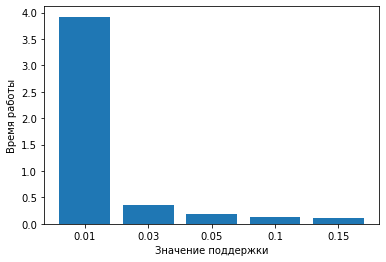

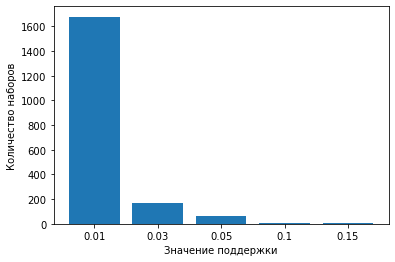

In [335]:

plt.bar(forplot, elaptime)
plt.xlabel("Значение поддержки")
plt.ylabel("Время работы")
plt.show()

plt.bar(forplot, lenres)
plt.xlabel("Значение поддержки")
plt.ylabel("Количество наборов")
plt.show()